In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as stats
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

<h3> Test for Normality Using Histogram </h3>
<p> The data is for each country for the year 2012 </p>

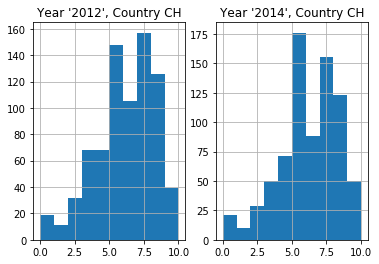

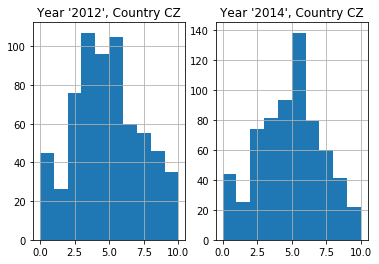

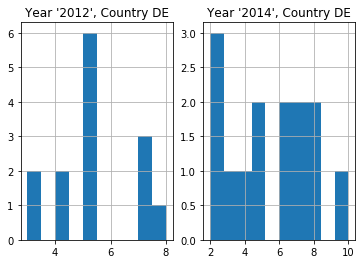

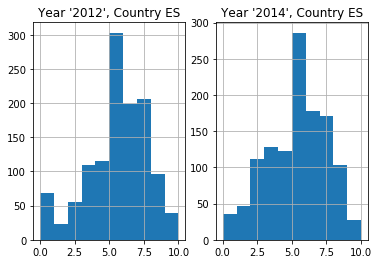

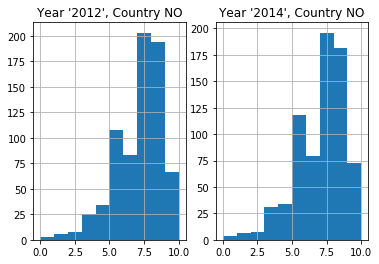

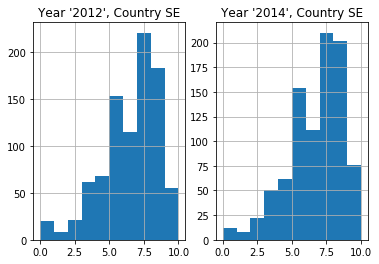

In [184]:
from pylab import *

for i in df['cntry'].unique():
    subplot(1,2,1)
    df[(df['year']==6) &(df['cntry']==i)]['ppltrst'].hist()
    plt.title("Year '2012', Country {}".format(i))
    subplot(1,2,2)
    df[(df['year']==7) &(df['cntry']==i)]['ppltrst'].hist()
    plt.title("Year '2014', Country {}".format(i))

    plt.show()

<h3> Test for Normality using Q-Q Plot </h3>
<p> Data is ordinal so this should show 10 distinct levels </p>

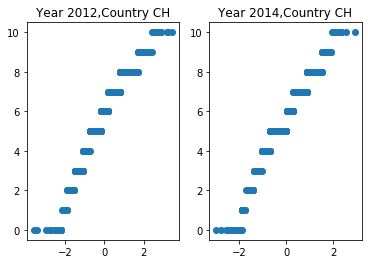

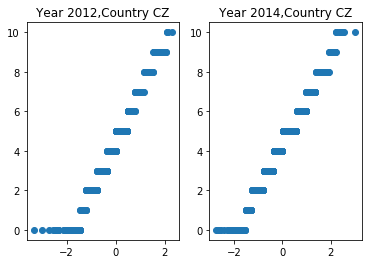

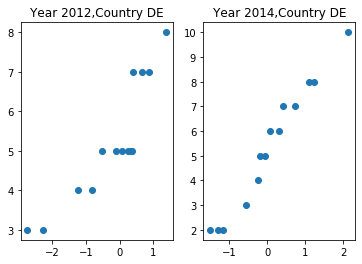

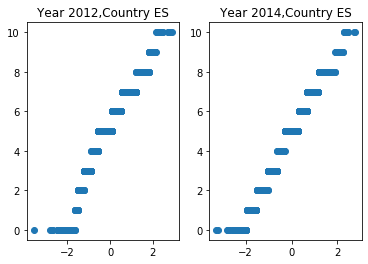

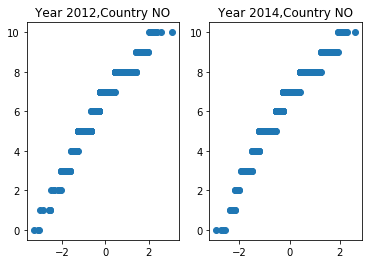

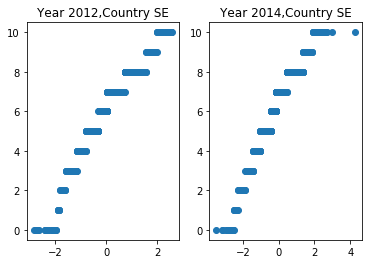

In [186]:
for i in df['cntry'].unique():
    subplot(1,2,1)
    data_sort1 = np.array(df[(df['year']==6) &(df['cntry']==i)]['ppltrst'])
    data_sort1 = np.sort(data_sort1)
    norm1 = np.random.normal(0, 1, data_sort1.shape)
    norm1 = np.sort(norm1)
    plt.plot(norm1, data_sort1, "o") 
    plt.title("Year 2012,Country {}".format(i))
    
    subplot(1,2,2)
    data_sort2 = np.array(df[(df['year']==7) &(df['cntry']==i)]['ppltrst'])
    data_sort2 = np.sort(data_sort2)
    norm2 = np.random.normal(0, 1, data_sort2.shape)
    norm2 = np.sort(norm2)
    plt.plot(norm2, data_sort2, "o") 
    plt.title("Year 2014,Country {}".format(i))
    
    plt.show()

<h3> Using Parametric Kruskal To determine whether there are any changes to trust over 2012 to 2014 for each country</h3>

In [219]:
df['cntry'].unique()[0:3]

array(['CH', 'CZ', 'DE'], dtype=object)

In [180]:
for i in df['cntry'].unique():
    
    data1 = np.array(df[(df['year']==6) &(df['cntry']==i)]['ppltrst'])
    data2 = np.array(df[(df['year']==7) &(df['cntry']==i)]['ppltrst'])
    
    data_df = pd.DataFrame()
    
    ranks = stats.rankdata(data1.tolist()+data2.tolist())
    
    data_df['2012'] = ranks[0:data1.shape[0]]
    data_df['2014'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
    
    groups = ['2012', '2014']
    print(i)
    print(data_df[groups].apply(np.mean))
    print('Overall average rank {}'.format(np.mean(ranks)))
    
    print(stats.kruskal(data_df['2012'] ,data_df['2014']))
    print("\n")

CH
2012    767.342173
2014    779.657827
dtype: float64
Overall average rank 773.5
KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)


CZ
2012    652.761398
2014    664.238602
dtype: float64
Overall average rank 658.5
KruskalResult(statistic=0.30499890159322074, pvalue=0.5807653977930165)


DE
2012    14.214286
2014    14.785714
dtype: float64
Overall average rank 14.5
KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)


ES
2012    1252.707337
2014    1174.292663
dtype: float64
Overall average rank 1213.5
KruskalResult(statistic=7.792687003293334, pvalue=0.0052458122124571715)


NO
2012    736.833105
2014    726.166895
dtype: float64
Overall average rank 731.5
KruskalResult(statistic=0.24375348038931446, pvalue=0.6215082004307686)


SE
2012    884.589207
2014    932.410793
dtype: float64
Overall average rank 908.5
KruskalResult(statistic=3.8942708556734393, pvalue=0.04845106633970311)




<h3> Did people become happier from 2012 to 2014 </h3>

In [227]:
df['happy_2012'] =df[(df['year'] == 6)]['happy']

In [226]:
df['happy_2012'] =df[(df['year'] == 7)]['happy']

<h3> Data do not look to be statistically different if we use a significance level alpha = 0.001 </h3>


In [192]:
    data1 = df[(df['year'] == 6)]['happy']
    data2 = df[(df['year'] == 7)]['happy']
    
    data_df = pd.DataFrame()
    
    ranks = stats.rankdata(data1.tolist()+data2.tolist())
    
    data_df['2012'] = ranks[0:data1.shape[0]]
    data_df['2014'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
    
    groups = ['2012', '2014']
    print(data_df[groups].apply(np.mean))
    print('Overall average rank {}'.format(np.mean(ranks)))
    
    print(stats.kruskal(data_df['2012'] ,data_df['2014']))
    print("\n")

2012    4361.519549
2014    4233.480451
dtype: float64
Overall average rank 4297.5
KruskalResult(statistic=5.977772305621932, pvalue=0.014487289811649167)




<h3> Who reported watching more TV in 2012, men or women? </h3>
<p> Since the variable is still ordinal we will compare the ranked means and also check to see if there is a difference and whether that difference is statistically significant </p>

In [217]:
    data1 = df[(df['gndr'] == 1)]['tvtot']
    data2 = df[(df['gndr'] == 2)]['tvtot']
    
    data_df = pd.DataFrame()
    data_df1 = pd.DataFrame()
    
    ranks = stats.rankdata(data1.tolist()+data2.tolist())
    
    data_df['male']   = ranks[0:data1.shape[0]]
    data_df1['female'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
    
    group1 = ['male']
    print(data_df[group1].apply(np.mean))
    group2 = ['female']
    print(data_df1[group2].apply(np.mean))

    print('Overall average rank {}'.format(np.mean(ranks)))
    
    print(stats.kruskal(data_df['male'] ,data_df1['female']))
    print("\n")

male    4251.104611
dtype: float64
female    4334.360942
dtype: float64
Overall average rank 4292.5
KruskalResult(statistic=2.4735093968099924, pvalue=0.11577915973048782)




<p> If we observe the ranked means for each group we see that the average ranked mean is greater for that of females however this is not a statistically significant difference when compared to males </p>

In [218]:
    data1 = df[(df['partner'] == 1)]['pplfair']
    data2 = df[(df['partner'] == 2)]['pplfair']
    
    data_df = pd.DataFrame()
    data_df1 = pd.DataFrame()
    
    ranks = stats.rankdata(data1.tolist()+data2.tolist())
    
    data_df['partner']    = ranks[0:data1.shape[0]]
    data_df1['nopartner'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
    
    group1 = ['partner']
    print(data_df[group1].apply(np.mean))
    group2 = ['nopartner']
    print(data_df1[group2].apply(np.mean))

    print('Overall average rank {}'.format(np.mean(ranks)))
    
    print(stats.kruskal(data_df['partner'] ,data_df1['nopartner']))
    print("\n")

partner    4360.815011
dtype: float64
nopartner    4174.217813
dtype: float64
Overall average rank 4289.0
KruskalResult(statistic=11.834552890767963, pvalue=0.0005814165755976679)




<p> Since the mean happiness ranked score of those with partners is greater than those without and the difference is statistically significant it can be said that those with partners are more trusting than those without </p>

In [235]:
data1 = df[(df['year']==7)&(df['cntry']=='CH')]['sclact']
data2 = df[(df['year']==7)&(df['cntry']=='CZ')]['sclact']
data3 = df[(df['year']==7)&(df['cntry']=='SE')]['sclact']

data_df1 = pd.DataFrame()
data_df2 = pd.DataFrame()
data_df3 = pd.DataFrame()
    
ranks = stats.rankdata(data1.tolist()+data2.tolist()+data3.tolist())
    
data_df1['CH'] = ranks[0:data1.shape[0]]
data_df2['CZ'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
data_df3['SE'] = ranks[data2.shape[0]+data1.shape[0]:data3.shape[0]+data2.shape[0]+data1.shape[0]]

group1 = ['CH']
group2 = ['CZ']
group3 = ['SE']

print(data_df1[group1].apply(np.mean))
print(data_df2[group2].apply(np.mean))
print(data_df3[group3].apply(np.mean))

print('Overall average rank {}'.format(np.mean(ranks)))
    
print(stats.kruskal(data_df1['CH'] ,data_df2['CZ'],data_df3['SE']))

print(stats.kruskal(data_df1['CH'] ,data_df2['CZ']))
print(stats.kruskal(data_df1['CH'] ,data_df3['SE']))
print(stats.kruskal(data_df2['CZ'] ,data_df3['SE']))


print("\n")

CH    1153.287193
dtype: float64
CZ    1118.608663
dtype: float64
SE    1221.469714
dtype: float64
Overall average rank 1170.0
KruskalResult(statistic=11.064844378579695, pvalue=0.003956394337638956)
KruskalResult(statistic=0.9951605679480998, pvalue=0.31848434910802453)
KruskalResult(statistic=4.717878137061653, pvalue=0.02985055609230618)
KruskalResult(statistic=10.647042436453159, pvalue=0.001102470640711428)




### All statistically different ratings on social meetings 'SE' stands out

In [251]:
data1 = df[(df['year']==7)&(df['cntry']=='CH')]['sclmeet']
data2 = df[(df['year']==7)&(df['cntry']=='CZ')]['sclmeet']
data3 = df[(df['year']==7)&(df['cntry']=='SE')]['sclmeet']
data4 = df[(df['year']==7)&~(df['cntry']=='CH')&~(df['cntry']=='CZ')&~~(df['cntry']=='SE')]['sclmeet']

data_df1 = pd.DataFrame()
data_df2 = pd.DataFrame()
data_df3 = pd.DataFrame()
data_df4 = pd.DataFrame()

ranks = stats.rankdata(data1.tolist()+data2.tolist()+data3.tolist()+data4.tolist())
    
data_df1['CH'] = ranks[0:data1.shape[0]]
data_df2['CZ'] = ranks[data1.shape[0]:data2.shape[0]+data1.shape[0]]
data_df3['SE'] = ranks[data2.shape[0]+data1.shape[0]:data3.shape[0]+data2.shape[0]+data1.shape[0]]
data_df4['Oth']= ranks[data3.shape[0]+data2.shape[0]+data1.shape[0]:data4.shape[0]+data3.shape[0]+data2.shape[0]+data1.shape[0]]

group1 = ['CH']
group2 = ['CZ']
group3 = ['SE']
group4 = ['Oth']

print(data_df1[group1].apply(np.mean))
print(data_df2[group2].apply(np.mean))
print(data_df3[group3].apply(np.mean))
print(data_df4[group4].apply(np.mean))


print('Overall average rank {}'.format(np.mean(ranks)))
    
print(stats.kruskal(data_df1['CH'] ,data_df2['CZ'],data_df3['SE'],data_df4['Oth']))

print(stats.kruskal(data_df1['CH'] ,data_df2['CZ']))
print(stats.kruskal(data_df1['CH'] ,data_df3['SE']))
print(stats.kruskal(data_df1['CH'] ,data_df4['Oth']))

print(stats.kruskal(data_df2['CZ'] ,data_df3['SE']))
print(stats.kruskal(data_df2['CZ'] ,data_df4['Oth']))

print(stats.kruskal(data_df3['SE'] ,data_df4['Oth']))



CH    1600.696636
dtype: float64
CZ    1186.661854
dtype: float64
SE    1792.382159
dtype: float64
Oth    1792.382159
dtype: float64
Overall average rank 1624.0
KruskalResult(statistic=213.30242108253069, pvalue=5.628953354788419e-46)
KruskalResult(statistic=85.11306267835597, pvalue=2.817828205732791e-20)
KruskalResult(statistic=21.067680915616865, pvalue=4.433429638470801e-06)
KruskalResult(statistic=21.067680915616865, pvalue=4.433429638470801e-06)
KruskalResult(statistic=158.68997618955473, pvalue=2.1871567090573835e-36)
KruskalResult(statistic=158.68997618955473, pvalue=2.1871567090573835e-36)
KruskalResult(statistic=0.0, pvalue=1.0)


2204    4.0
2205    5.0
2206    4.0
2207    4.0
2208    5.0
2209    6.0
2210    4.0
2211    3.0
2212    5.0
2213    4.0
2214    3.0
2215    4.0
2216    3.0
2217    3.0
2218    3.0
2219    4.0
2220    3.0
2221    3.0
2222    4.0
2223    4.0
2224    4.0
2225    5.0
2226    3.0
2227    4.0
2228    6.0
2229    6.0
2230    7.0
2231    7.0
2232    4.0
2233    2.0
       ... 
8564    7.0
8565    6.0
8566    7.0
8567    7.0
8568    7.0
8569    6.0
8570    7.0
8571    6.0
8572    3.0
8573    7.0
8574    7.0
8575    7.0
8576    6.0
8577    4.0
8578    5.0
8579    7.0
8580    4.0
8581    6.0
8582    7.0
8583    6.0
8584    6.0
8585    7.0
8586    7.0
8587    7.0
8588    7.0
8589    6.0
8590    6.0
8591    6.0
8592    7.0
8593    7.0
Name: sclmeet, Length: 3524, dtype: float64

In [249]:
len(ranks)

3247